<a href="https://colab.research.google.com/github/ThalyaGIT/UK-Music-Index-Returns/blob/main/UK_Music_Happiness_and_Index_Returns_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Import packages
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Open CSV into dataframe
url = 'https://raw.githubusercontent.com/ThalyaGIT/Happy-Beats-Stocks/main/0-data-gold/data.csv'
df = pd.read_csv(url)

# Select columns that will be used
df = df[[ '% FTSE100 Change'                         # Dependent Variable: Weekly % Change in FTSE 100
         , 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
         , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
         , 'Vix Close'                               # Control 5: Volaitlity Index of the day
         , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
        ]]

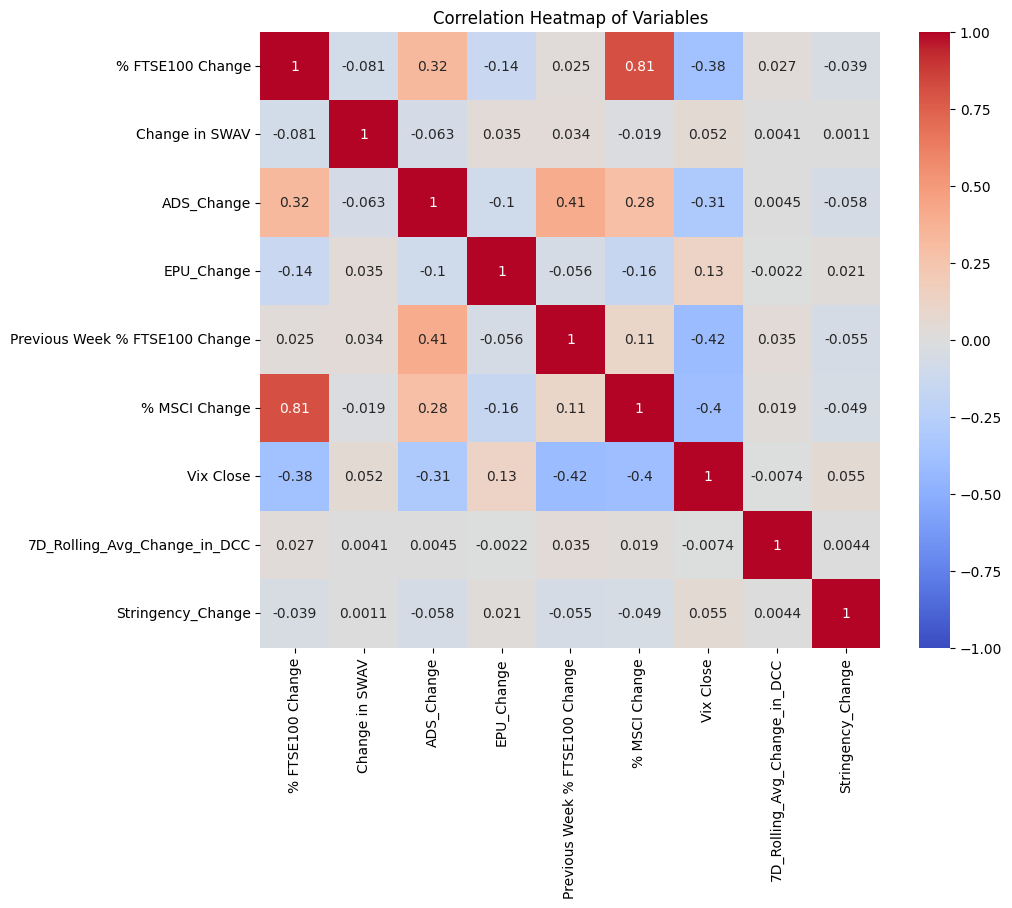

In [50]:
# Explore Data

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Variables')
plt.show()

# **Basic Regression with No Controlling Variables**

In [51]:
# Define dependent and independent variables

#  Define the dependent variable
y = df[ '% FTSE100 Change' ]

# Define the independent variable as 'Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify' Only
X = df[[ 'Change in SWAV' ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [52]:
# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     24.10
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           9.54e-07
Time:                        21:09:23   Log-Likelihood:                -9617.2
No. Observations:                3693   AIC:                         1.924e+04
Df Residuals:                    3691   BIC:                         1.925e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0356      0.054      0.

## Findings

**Low Explanatory Power:** The model has an R-squared of 0.006, indicating a poor fit.

**Significant Negative Effect:** Change in SWAV significantly decreases FTSE 100 change (coefficient = -11.5132, p < 0.001).

**Model Significance:** The model is statistically significant (F-statistic = 24.10, p < 0.001).

**Non-Significant Intercept:** The constant term is not significant (p = 0.508).

**Residual Issues:** Residuals show non-normality and autocorrelation, indicating model assumption problems.

# **Basic Regression with All Controlling Variables**




In [53]:
# Define dependent and independent variables

#  Define the dependent variable
y = df['% FTSE100 Change']

# Define the independent variables, including 'Change in SWAV' and the other control variables
X = df[[ 'Change in SWAV'                          # Independent Variable: Weekly Change in Stream Weighted Average Valence of UK Top Charts on Spotify
         , 'ADS_Change'                              # Control 1: Weekly Change in Aruoba-Diebold-Scotti Business Conditions Index
         , 'EPU_Change'                              # Control 2: Weekly Change in Economic Policy Uncertainty Index
         , 'Previous Week % FTSE100 Change'          # Control 3: Weekly % Change in FTSE 100 from a week before
         , '% MSCI Change'                           # Control 4: Weekly % Change in MSCI World Index
         , 'Vix Close'                               # Control 5: Volaitlity Index of the day
         , '7D_Rolling_Avg_Change_in_DCC'            # Control 6: Average Change in Deseasonalised Cloud Cover over the Last Week
         , 'Stringency_Change'                       # Control 7: Weekly Change in Covid Stringency Rules
        ]]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

In [54]:
# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       % FTSE100 Change   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1014.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:09:23   Log-Likelihood:                -7480.6
No. Observations:                3693   AIC:                         1.498e+04
Df Residuals:                    3684   BIC:                         1.504e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Findings

**Good Fit**: The model has a high explanatory power with an **R-squared of 0.688**, indicating it explains **68.8% of the variance** in FTSE 100 changes.

### Significant Predictors:
- **Change in SWAV**: Significant negative effect (**coefficient = -6.7969**, **p < 0.001**).
- **ADS_Change**: Significant positive effect (**coefficient = 0.3047**, **p < 0.001**).
- **Previous Week % FTSE100 Change**: Significant negative effect (**coefficient = -0.1507**, **p < 0.001**).
- **% MSCI Change**: Significant positive effect (**coefficient = 0.6873**, **p < 0.001**).
- **Vix Close**: Significant negative effect (**coefficient = -0.0358**, **p < 0.001**).

### Insignificant Predictors:
- **EPU_Change**: Not significant (**p = 0.955**).
- **7D_Rolling_Avg_Change_in_DCC**: Marginally significant (**p = 0.064**).
- **Stringency_Change**: Not significant (**p = 0.782**).


**Model Significance**: The overall model is highly significant (**F-statistic = 1014**, **p < 0.001**).

**Residual Diagnostics**: Residuals show slight skewness and kurtosis, with a **Durbin-Watson statistic of 0.098** indicating potential autocorrelation issues.
